##  Part 1 simple linear regression
### To do

* Explain w/partner each line in this notebook and execute each cell  
* Explore relationship between quality of prediction and (size of training set / noise level)
    * Specifically discuss how you would automate this searching

### Discuss how you would implement the following calculations, with a function, as they are not available in sklearn (this is a big part of HW4!)

### Missing information for assessing coefficients: 

* 95% CI 
* Standard Error for $\beta_0$ and $\beta _1$
* P-value for test of $H_0$

### Missing information for assessing the model: 

* RSE , RSS , $R^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn import linear_model
%matplotlib inline

In [2]:
#model: Y = 3X + 4
#size of training data and scale of random noise 
pts=25 
noisescale=.25 
x=np.linspace(-50,50,num=pts)
B0=4
B1=3
yactual=B0+B1*x
np.random.seed(123) #for reproducible 
#add noise scaled to 25% of range to data
yrand=yactual+noisescale*(yactual.max()-yactual.min())*np.random.normal(size=pts)

In [3]:
x

array([-50.        , -45.83333333, -41.66666667, -37.5       ,
       -33.33333333, -29.16666667, -25.        , -20.83333333,
       -16.66666667, -12.5       ,  -8.33333333,  -4.16666667,
         0.        ,   4.16666667,   8.33333333,  12.5       ,
        16.66666667,  20.83333333,  25.        ,  29.16666667,
        33.33333333,  37.5       ,  41.66666667,  45.83333333,
        50.        ])

In [5]:
yrand

array([-227.42229525,  -58.69909151,  -99.77661265, -221.47210354,
       -139.3950189 ,   40.35774028, -253.00094325,  -90.66844716,
         48.9452194 ,  -98.50553017,  -71.91646137,  -15.60317267,
        115.85422196,  -31.41764975,   -4.29864697,    8.92365433,
        219.4447562 ,  230.50895667,  154.30404234,  120.46397994,
        159.30264319,  228.30490211,   58.81245987,  229.68717836,
         59.95894992])

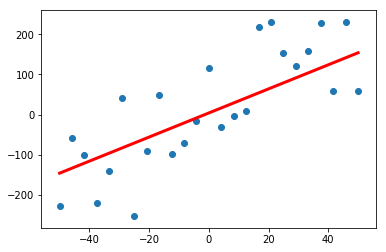

In [6]:
plt.plot(x,yactual,color='red',lw='3')
plt.scatter(x,yrand)

In [16]:
x.reshape(-1,1)

array([[-50.        ],
       [-45.83333333],
       [-41.66666667],
       [-37.5       ],
       [-33.33333333],
       [-29.16666667],
       [-25.        ],
       [-20.83333333],
       [-16.66666667],
       [-12.5       ],
       [ -8.33333333],
       [ -4.16666667],
       [  0.        ],
       [  4.16666667],
       [  8.33333333],
       [ 12.5       ],
       [ 16.66666667],
       [ 20.83333333],
       [ 25.        ],
       [ 29.16666667],
       [ 33.33333333],
       [ 37.5       ],
       [ 41.66666667],
       [ 45.83333333],
       [ 50.        ]])

In [15]:
x

array([-50.        , -45.83333333, -41.66666667, -37.5       ,
       -33.33333333, -29.16666667, -25.        , -20.83333333,
       -16.66666667, -12.5       ,  -8.33333333,  -4.16666667,
         0.        ,   4.16666667,   8.33333333,  12.5       ,
        16.66666667,  20.83333333,  25.        ,  29.16666667,
        33.33333333,  37.5       ,  41.66666667,  45.83333333,
        50.        ])

In [17]:
#EXPLAIN IN PLAIN LANGUAGE WHAT THIS LINE IS DOING!
regr=linear_model.LinearRegression() 
# note that x.reshape(-1,1) is required because I must strictly
# feed regr.fit a 200x1 array , np.linspace returned a list of numbers
regr.fit(x.reshape(-1,1),yrand.reshape(-1,1))
print('B0, B1: ',regr.intercept_, regr.coef_[0])

B0, B1:  [14.50770926] [3.76217657]


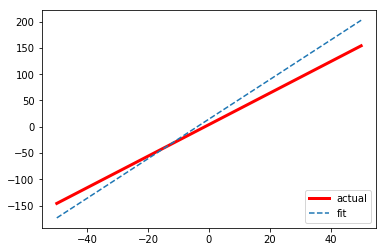

In [19]:
plt.plot(x,yactual,color='red',lw='3',label='actual')
plt.plot(x,regr.predict(x.reshape(-1,1)),ls='--',label='fit')
plt.legend(loc='lower right')

### Take a few mins and see if you can 

Useful plots to make after simple linear regression: 

1) X vs Y (showing both training data, fit model, and result of predictionsw on test data (if you have any) 

2) Y vs Y(hat):  this is called a *parity plot* 

3) X v s *residual* (Y - Y(hat)) 

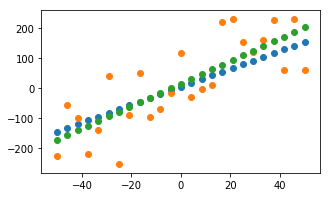

In [24]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, yactual, label='actual')
ax.scatter(x, yrand, label='measured')
ax.scatter(x, regr.predict(x.reshape(-1,1)), label='predicted')

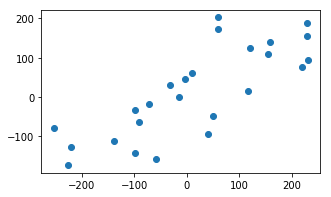

In [34]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(yrand, regr.predict(x.reshape(-1,1)), label='parity')

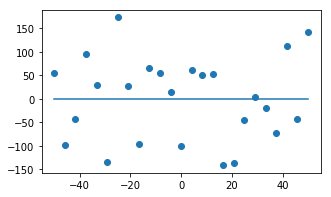

In [37]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, regr.predict(x.reshape(-1,1)) - yrand)
ax.plot(x, 0*x)

### Multiple linear regression

In this 2nd example, we generate model based on the idea that the $PCE$ of a candidate organic photovoltaic can be modeled as a contribution of the molecule's $mass$, $VOC$ and $E_{LUMO}$ values:  $PCE = \beta_0 + \beta_1*mass + \beta_2*VOC + \beta_3 * E_{LUMO}$

The extension from simple to multiple linear regression is trivial - can you figure it out with your partner or at your table?!

In [38]:
harvard=pd.read_csv('https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/HCEPD_100K.csv')
# you need to complete these lines 
# (but first you might refresh yourself on what is contained in harvard

# keep the same variable names - 
# regr2=STUFF
# regr2.fit(STUFF) 
# once your model is trained, can you make a parity plot: plot actual PCE data on x vs
# trained PCE data on y. Also plot the line of parity so your eye can follow how good
# your predictions are doing....

In [ ]:
#model: Y = 3X + 4
#size of training data and scale of random noise 


In [44]:
def regression(points=25, x_range=[-50,50], coefs=[4, 3], noisescale=0.25):
    pts=25 
    noisescale=.25 
    x=np.linspace(x_range[0],x_range[1],num=points)
    B0=coefs[0]
    B1=coefs[1]
    yactual=B0+B1*x
    #np.random.seed(123) #for reproducible 
    #add noise scaled to 25% of range to data
    yrand=yactual+noisescale*(yactual.max()-yactual.min())*np.random.normal(size=points)

    #EXPLAIN IN PLAIN LANGUAGE WHAT THIS LINE IS DOING!
    regr=linear_model.LinearRegression() 
    # note that x.reshape(-1,1) is required because I must strictly
    # feed regr.fit a 200x1 array , np.linspace returned a list of numbers
    regr.fit(x.reshape(-1,1),yrand.reshape(-1,1))
    return regr.intercept_[0], regr.coef_[0][0]

In [45]:
repeats = 1000
B0 = [0]*repeats
B1 = [0]*repeats
for i in range(repeats):
    B0[i], B1[i] = regression(points=25, noisescale=0.25)

In [57]:
repeats = 1000
noisescale = 0.25
B0 = [0]*repeats
B1 = [0]*repeats
for i in range(repeats):
    B0[i], B1[i] = regression(points=25, noisescale=noisescale)
print('95% CI Intercept: {} - {}'.format(np.round(np.percentile(np.array(B0), 5), 2), np.round(np.percentile(np.array(B0), 95), 2)))
print('95% CI Intercept: {} - {}'.format(np.round(np.percentile(np.array(B1), 5), 2), np.round(np.percentile(np.array(B1), 95), 2)))

95% CI Intercept: -19.17 - 28.09
95% CI Intercept: 2.22 - 3.73


In [84]:
def regression_cis(points, noisescale, repeats):
    B0 = [0]*repeats
    B1 = [0]*repeats
    for i in range(repeats):
        B0[i], B1[i] = regression(points=points, noisescale=noisescale)
    print('95% CI Intercept: {} - {}'.format(np.round(np.percentile(np.array(B0), 5), 2), np.round(np.percentile(np.array(B0), 95), 2)))
    print('95% CI Slope: {} - {}'.format(np.round(np.percentile(np.array(B1), 5), 2), np.round(np.percentile(np.array(B1), 95), 2)))
    return [np.percentile(np.array(B0), 5), np.percentile(np.array(B0), 95)], [np.percentile(np.array(B1), 5), np.percentile(np.array(B1), 95)]

95% CI Intercept: -53.26 - 58.09
95% CI Slope: 1.51 - 4.56
95% CI Intercept: -35.92 - 41.17
95% CI Slope: 1.76 - 4.24
95% CI Intercept: -8.53 - 16.75
95% CI Slope: 2.57 - 3.44
95% CI Intercept: 0.05 - 7.91
95% CI Slope: 2.87 - 3.13
95% CI Intercept: 2.73 - 5.3
95% CI Slope: 2.96 - 3.04
95% CI Intercept: 3.61 - 4.35
95% CI Slope: 2.99 - 3.01


[]

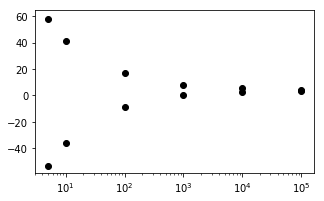

In [85]:
B0cilo = []
B0cihi = []
B1cilo = []
B1cihi = []
points = [5, 10, 100, 1000, 10000, 100000]
for i in points:
    B0ci0, B1ci0 = regression_cis(i, noisescale, 1000)
    B0cilo.append(B0ci0[0])
    B0cihi.append(B0ci0[1])
    B1cilo.append(B1ci0[0])
    B1cihi.append(B1ci0[1])

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(points, B0cilo, color='k')
ax.scatter(points, B0cihi, color='k')
plt.semilogx()

[]

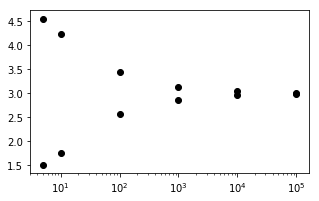

In [86]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(points, B1cilo, color='k')
ax.scatter(points, B1cihi, color='k')
plt.semilogx()

95% CI Intercept: 0.16 - 7.7
95% CI Slope: 2.86 - 3.14
95% CI Intercept: 0.04 - 7.99
95% CI Slope: 2.87 - 3.12
95% CI Intercept: 0.08 - 7.97
95% CI Slope: 2.86 - 3.13
95% CI Intercept: 0.41 - 7.87
95% CI Slope: 2.86 - 3.13
95% CI Intercept: 0.02 - 8.15
95% CI Slope: 2.87 - 3.13
95% CI Intercept: 0.11 - 7.97
95% CI Slope: 2.87 - 3.13
95% CI Intercept: 0.15 - 8.02
95% CI Slope: 2.87 - 3.14
95% CI Intercept: -0.03 - 8.02
95% CI Slope: 2.87 - 3.13
95% CI Intercept: 0.02 - 7.9
95% CI Slope: 2.86 - 3.14
95% CI Intercept: -0.01 - 8.08
95% CI Slope: 2.87 - 3.13
95% CI Intercept: 0.27 - 7.94
95% CI Slope: 2.86 - 3.13
95% CI Intercept: 0.03 - 7.95
95% CI Slope: 2.87 - 3.14
95% CI Intercept: 0.08 - 7.83
95% CI Slope: 2.88 - 3.14
95% CI Intercept: 0.26 - 7.77
95% CI Slope: 2.86 - 3.14


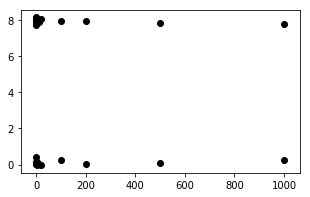

In [97]:
B0cilo = []
B0cihi = []
B1cilo = []
B1cihi = []
points = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 5, 10, 20, 100, 200, 500, 1000]
for noise in points:
    B0ci0, B1ci0 = regression_cis(1000, noise, 1000)
    B0cilo.append(B0ci0[0])
    B0cihi.append(B0ci0[1])
    B1cilo.append(B1ci0[0])
    B1cihi.append(B1ci0[1])

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(points, B0cilo, color='k')
ax.scatter(points, B0cihi, color='k')

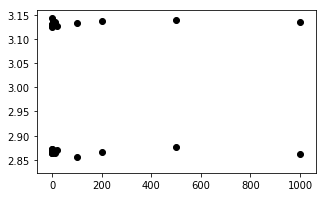

In [98]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(points, B1cilo, color='k')
ax.scatter(points, B1cihi, color='k')